<a href="https://colab.research.google.com/github/jovian-explorer/expeyes17/blob/main/Single_stage_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Required libraries

In [ ]:
pip install lmfit

     |████████████████████████████████| 292 kB 4.3 MB/s 
     |████████████████████████████████| 40 kB 4.9 MB/s 
     |████████████████████████████████| 98 kB 7.5 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84402 sha256=9e151971d57b89598f6f40b64da78552ec5f23a56b41efaf6a44ec9b33c0a626
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
  Created wheel for asteval: filename=asteval-0.9.26-py3-none-any.whl size=17648 sha256=f5c451e43a55168bbea8d9bbaf2ac09e4c43c800107fe80d653f37d012f00c56
  Stored in directory: /root/.cache/pip/wheels/4c/e9/f0/bc343d5b77d2fded45177f424a6b0b9224b92ff6e7c150bad4
Successfully built lmfit asteval


In [ ]:
#importing libraries required
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.optimize import curve_fit
import scipy.optimize as so
from lmfit import minimize, Parameters, Parameter
import warnings
warnings.filterwarnings("ignore")

##Single Stage filters

###Low Pass Filter

####Frequency v/s Amplitude Gain

Text(0, 0.5, 'Normalised Gain')

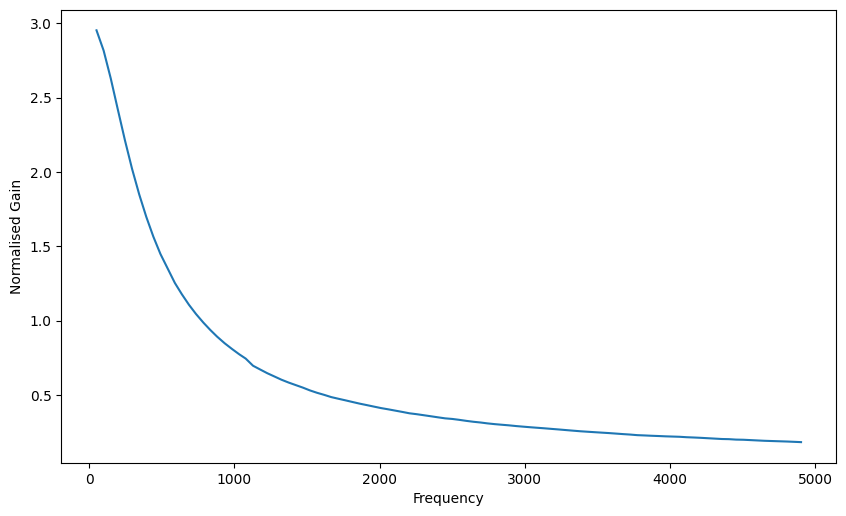

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/jovian-explorer/expeyes17/main/Filters/Single-stage-filters/Low-pass-filter/lpf.csv')
data.columns = ["freq","gain"]
#storing values for each column into a separate list
x= data.freq
y = data.gain
plt.figure(figsize=(10,6),dpi=100)
plt.plot(x,y)
plt.xlabel('Frequency')
plt.ylabel('Normalised Gain')


Model has converged
The estimated value of R after curve fit is 438.5251124505283 +- 3106340715.095328
The estimated value of C after curve fit is 3.360935980634139e-07 +- 2.421756989328579


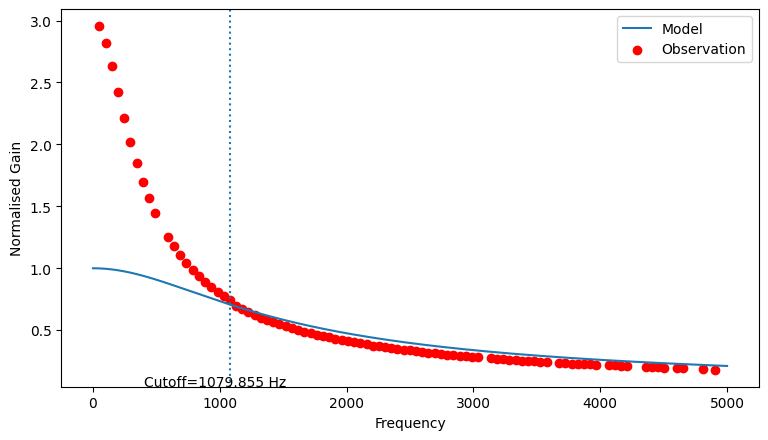

In [ ]:
def funct(dparams,x,data):
    a1=dparams['R'].value
    a2=dparams['C'].value
    model = 1/((2*np.pi*x*a2)*np.sqrt(a1**2+1/(2*np.pi*x*a2)**2))
    return data -  model

params=Parameters()
params.add('R',value=620,min=0)
params.add('C',value=10**-6,min=0)

mi = minimize(funct,params,args=(x,y))
res = mi.residual
convgd = int(mi.errorbars)

if convgd==1:
  print("Model has converged")

v=[mi.params['R'].value,mi.params['C'].value]
v_error=[mi.params['R'].stderr,mi.params['C'].stderr]

a1=v[0]
a2=v[1]
errorz1=v_error[0]
errorz2=v_error[1]
print('The estimated value of R after curve fit is',a1,'+-',errorz1)
print('The estimated value of C after curve fit is', a2,'+-',errorz2)

x1=np.linspace(0,5000,100000)

plt.figure(figsize=(9,5),dpi=100)
plt.scatter(x,y,c='r',label='Observation')
plt.plot(x1,1/((2*np.pi*x1*a2)*np.sqrt(a1**2+1/(2*np.pi*x1*a2)**2)),label='Model')
plt.axvline(1/(2*np.pi*a1*a2),linestyle=':')
plt.text(400,0.05,f'Cutoff={np.round(1/(2*np.pi*a1*a2),3)} Hz')
plt.xlabel('Frequency')
plt.ylabel('Normalised Gain')
plt.legend()

plt.show()

####Frequency v/s Phase Difference

Model has converged
The estimated value of RC after curve fit is 0.0005946528792608596 +- 1.0469002559100966e-05


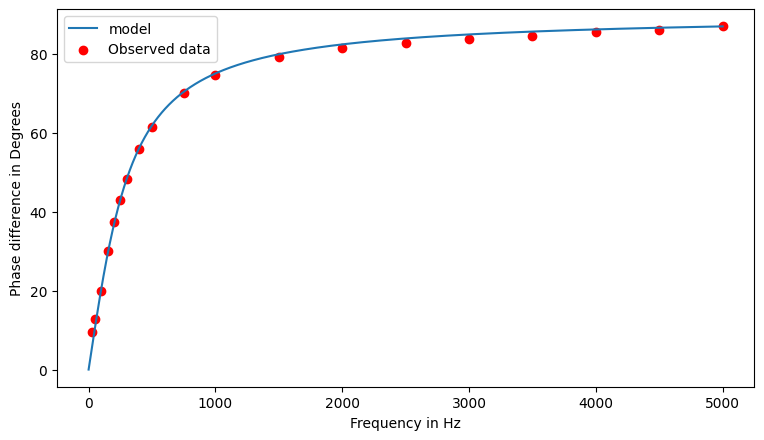

The model fit gives a cutoff of 268.0 Hz


In [ ]:
x=np.array([25,50,100,150,200,250,300,400,500,750,1000,1500,2000,2500,3000,3500,4000,4500,5000])
y=np.array([9.63,12.83,19.8,30.02,37.39,42.84,48.19,55.94,61.57,70.09,74.52,79.11,81.58,82.71,83.81,84.61,85.53,86.12,86.94])

def funct(dparams,x,data):
    a1=dparams['RC'].value
    model = np.arctan(a1*2*np.pi*x)*360/(2*np.pi)
    return data -  model

params=Parameters()
params.add('RC',value=6.2*10**-4,min=0)

mi = minimize(funct,params,args=(x,y))
res = mi.residual
convgd = int(mi.errorbars)

if convgd==1:
  print("Model has converged")

v=[mi.params['RC'].value]
v_error=[mi.params['RC'].stderr]

a1=v[0]
errorz=v_error[0]
print('The estimated value of RC after curve fit is',a1,'+-',errorz)

x1=np.linspace(0,5000,100000)

plt.figure(figsize=(9,5),dpi=100)
plt.scatter(x,y,c='r',label='Observed data')
plt.plot(x1,np.arctan(a1*2*np.pi*x1)*360/(2*np.pi),label='model')
plt.xlabel('Frequency in Hz')
plt.ylabel('Phase difference in Degrees')
plt.legend()
plt.show()

print('The model fit gives a cutoff of',np.round(1/(2*np.pi*a1)),'Hz')

###High Pass Filter

####Frequency v/s Amplitude Gain

In [ ]:
url3 = 'https://raw.githubusercontent.com/jovian-explorer/expeyes17/main/Filters/Single-stage-filters/High-pass-filter/data.csv'
dataset3 = pd.read_csv(url3, encoding='utf-8')
print(dataset3)

        freq   gain
0     50.979  0.563
1    100.969  1.056
2    150.966  1.464
3    200.965  1.782
4    251.004  2.025
..       ...    ...
87  4796.163  3.132
88  4854.369  3.131
89  4901.961  3.127
90  4950.495  3.124
91  5000.000  3.124

[92 rows x 2 columns]


In [ ]:
# accessing the different columns of the csv dataset I made above
dataset3.columns = ["freq","gain"]
#storing values for each column into a separate list
Frequency = np.array(dataset3.freq)
Gain = np.array(dataset3.gain) 

In [ ]:
#Calculations
R3 = 623
C3 = 10**(-6)
cutoff2 = 1/(2*np.pi *R3*C3)

print("Resistance taken is " + str(R3) +" Ohm")
print("Capacitance take is " + str(C3) + " Farad")
print("Cut-off frequency is " + str(cutoff2))

Resistance taken is 623 Ohm
Capacitance take is 1e-06 Farad
Cut-off frequency is 255.46539822134085


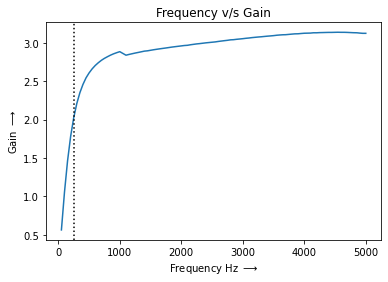

In [ ]:
plt.plot(Frequency,Gain)
plt.xlabel("Frequency Hz $\longrightarrow$")
plt.ylabel("Gain $\longrightarrow$")
plt.title("Frequency v/s Gain")
plt.axvline(cutoff2, color = 'k',linestyle=':')
plt.show()

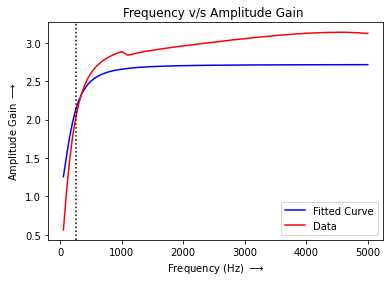

In [ ]:
def func5(Frequency, R, C):    
    return np.exp(R / np.sqrt((R**2) + (1/(2*np.pi * Frequency* C))**2))

popt3, pcov3 = curve_fit(func5,Frequency,Gain)
plt.plot(Frequency, func5(Frequency, *popt3), 'b-', label="Fitted Curve")
plt.plot(Frequency,Gain,color ='r',label = "Data" )

plt.xlabel("Frequency (Hz) $\longrightarrow$")
plt.ylabel("Amplitude Gain $\longrightarrow$")
plt.title("Frequency v/s Amplitude Gain ")
plt.axvline(cutoff2, color = 'k',linestyle=':')
plt.legend()
plt.show()

####Frequency v/s Phase Difference

In [ ]:
url4 = 'https://raw.githubusercontent.com/jovian-explorer/expeyes17/main/Filters/Single-stage-filters/High-pass-filter/phase.csv'
dataset4 = pd.read_csv(url4, encoding='utf-8')
print(dataset4)

      f  input  output
0   150  2.320  1.3500
1   255  1.380  0.8850
2   500  0.682  0.5250
3   800  0.411  0.3460
4  1000  0.241  0.1990
5  1500  0.160  0.1440
6  2000  0.118  0.1080
7  3000  0.078  0.0715
8  4000  0.054  0.0500
9  4500  0.715  0.7120


In [ ]:
f = dataset4.f
i = dataset4.input
o = dataset4.output
diff = (i-o)/1000
phase_diff = diff*f*2*np.pi
freq = np.linspace(0,5000,1000)
phi = np.arctan(1/(2*np.pi*freq*R3*C3))

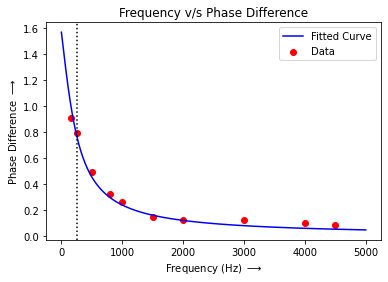

In [ ]:
def func1(freq, a, b):     
    return np.arctan(1/(2*np.pi*freq*a*b))

popt1, pcov1 = curve_fit(func1, f,phase_diff)
plt.plot(freq, func1(freq, *popt1), 'b-', label="Fitted Curve")
plt.scatter(f,phase_diff,color ='r',label = "Data" )
plt.xlabel("Frequency (Hz) $\longrightarrow$")
plt.ylabel("Phase Difference $\longrightarrow$")
plt.title("Frequency v/s Phase Difference")
plt.axvline(cutoff2, color = 'k',linestyle=':')
plt.legend()
plt.show()

###Band Pass Filter

In [ ]:
url10 = 'https://raw.githubusercontent.com/jovian-explorer/expeyes17/main/Filters/Single-stage-filters/Band-pass-filter/lcrfirst.csv'
dataset10 = pd.read_csv(url10, encoding='utf-8')
print(dataset10)

        freq   gain
0     58.907  0.620
1    107.759  0.974
2    156.642  1.188
3    205.592  1.313
4    254.582  1.387
..       ...    ...
85  4608.295  0.473
86  4651.163  0.469
87  4705.882  0.464
88  4750.594  0.460
89  4901.961  0.445

[90 rows x 2 columns]


In [ ]:
# accessing the different columns of the csv dataset I made above
dataset10.columns = ["freq","gain"]
#storing values for each column into a separate list
freq = np.array(dataset10.freq)
y = np.array(dataset10.gain) 

In [ ]:
#Calculations
R10 = 682
C10 = 10**(-6)
L10 = 0.158
cutoff10 = 1/(2*np.pi * np.sqrt(L10* C10))

print("Resistance taken is " + str(R10) +" Ohm")
print("Capacitance taken is " + str(C10) + " Farad")
print("Capacitance taken is " + str(L10) + " Henry")
print("Cut-off frequency is " + str(cutoff10))

Resistance taken is 682 Ohm
Capacitance taken is 1e-06 Farad
Capacitance taken is 0.158 Henry
Cut-off frequency is 400.3977129654999


####Frequency v/s Phase Difference

In [ ]:
fre=[ 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1250, 1500, 2000, 2500, 3000, 3500, 4000]
phased= [ 0.527, 0.226, 0.075, -0.094 ,-0.1507, -0.268, -0.402, -0.452, -0.502, -0.628, -0.753, -0.879, -1.099, -1.13, -1.19, -1.25]
fr = np.array(fre)
phase = np.array(phased)

Fitted Values of R = 3450.1813029239224 Ohm, L = 0.35831796243193437 H and C = 3.585803751704475e-07 F


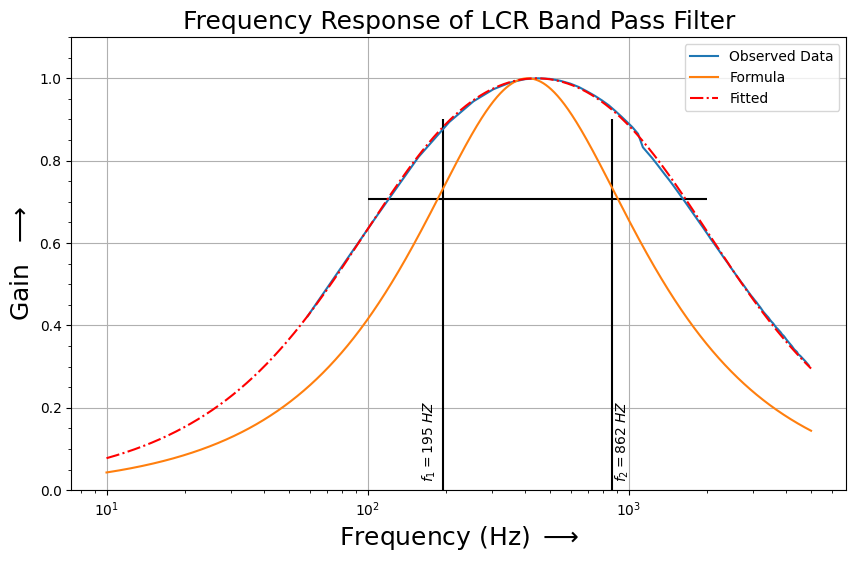

In [ ]:
ymax = np.max(y)
gain = y/ymax

L = 0.15 # Henry
R = 682  # Ohm
C = 0.000001 # Faraday
f = np.arange(10, 5000, 0.1)
def Gain_fun(L, C, R, f):
      w = 2*np.pi*f
      H = abs((R/L)*complex(0, w)/(-w**2+(R/L)*complex(0, w)+(1/(L*C))))
      return H

def Phase_diff(L, C, R, f):
      w = 2*np.pi*f
      theta = np.angle((R/L)*complex(0, w)/(-w**2+(R/L)*complex(0, w)+(1/(L*C))))
      return theta

gain_output = []
phase_output = []
for i in range(len(f)):
      gain_output = np.append(gain_output, Gain_fun(L, C, R, f[i]))
      phase_output = np.append(phase_output, Phase_diff(L, C, R, f[i]))

def LCR_series(dparams, f, data):
      R = dparams['R'].value
      L = dparams['L'].value
      C = dparams['C'].value
      w = 2*np.pi*f
      #model = abs((R/L)*complex(0, w)/(-w**2+(R/L)*complex(0, w)+(1/(L*C))))
      model = R/(np.sqrt(R**2 + (w*L - 1/(w*C))**2))
      return data - model

params = Parameters()
params.add('R', value = 500, min = 0.0)
params.add('L', value = 0.15, min = 0.0)
params.add('C', value = 0.000001, min = 0.0)
mi = minimize(LCR_series , params, args=(freq, gain))
res = mi.residual
convgd = int(mi.errorbars)

v = [mi.params['R'].value,mi.params['L'].value,mi.params['C'].value]

# Fitted Values
a1 = v[0]
b1 = v[1]
c1 = v[2]

print(f"Fitted Values of R = {a1} Ohm, L = {b1} H and C = {c1} F")
w = 2*np.pi*f
model = a1/(np.sqrt(a1**2 + (w*b1 - 1/(w*c1))**2))


phase_fitted = []
for i in range(len(f)):
      
      phase_fitted = np.append(phase_output, Phase_diff(b1, c1, a1, f[i]))



plt.figure(figsize = [10, 6],dpi = 100)

plt.plot(freq, gain, label = 'Observed Data')
plt.plot(f, gain_output, label = 'Formula')
plt.plot(f, model, 'r-.',label = 'Fitted')
plt.legend()
plt.xscale('log')
plt.minorticks_on()
plt.grid()
plt.title("Frequency Response of LCR Band Pass Filter", fontsize = 18)
plt.ylabel(r"Gain  $\longrightarrow$", fontsize = 18)
plt.xlabel(r"Frequency (Hz) $\longrightarrow$", fontsize =18)
plt.vlines(195, -0.5 , 0.9, colors= 'black')
plt.vlines(862, -0.5 , 0.9, colors= 'black')
plt.text(160, 0.03, r'$f_1 = 195~HZ$', rotation = 90)
plt.text(880, 0.03, r'$f_2 = 862~HZ$', rotation =90)
plt.ylim(0.0, 1.1)
plt.hlines(max(gain)/np.sqrt(2), 100, 2000)
plt.show()

####Frequency v/s Phase Difference

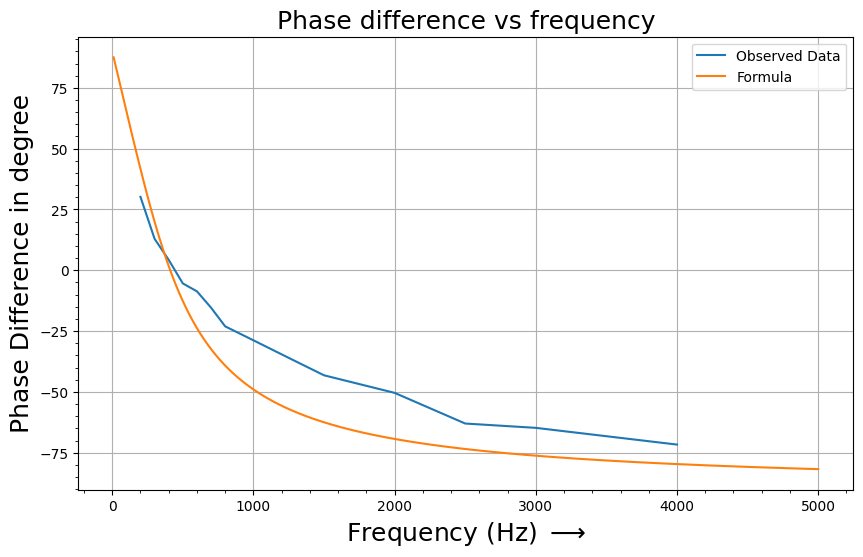

In [ ]:
plt.figure(figsize = [10, 6],dpi = 100)
plt.plot(fr, phase*180/np.pi, label = 'Observed Data')
plt.plot(f, phase_output*180/np.pi, label = 'Formula')
# plt.plot(f, phase_fitted[:-1]*180/np.pi)
plt.legend()

plt.minorticks_on()
plt.ylabel("Phase Difference in degree", fontsize = 18)
plt.grid()
plt.xlabel(r"Frequency (Hz) $\longrightarrow$", fontsize = 18)
plt.title("Phase difference vs frequency", fontsize = 18)
plt.show()